In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, sem
from scipy.optimize import curve_fit
# %matplotlib widget
%matplotlib inline

In [5]:
# Load the data from the Excel file
file_path = 'example data.xlsx'

# Load the data from the Excel file again, this time we will fetch the sheet by name "Sheet5"
data = pd.read_excel(file_path, sheet_name='all_data')

# Display the first few rows of the dataframe from "Sheet5"
data.head()

,time,wt - 0 - 1,wt - 10 - 1,wt - 30 - 1,wt - 150 - 1,wt - 600 - 1,wt - 1200 - 1,wt - 3000 - 1,mut - 0 - 1,mut - 10 - 1,...,wt - 600 - 3,wt - 1200 - 3,wt - 3000 - 3,mut - 0 - 3,mut - 10 - 3,mut - 30 - 3,mut - 150 - 3,mut - 600 - 3,mut - 1200 - 3,mut - 3000 - 3
0,0.000000,210591,203788,206271,191449,177651,174674,166478,204962,204695,...,181368,173056,164314,205360,204069,200692,191013,192446,186143,183736
1,0.316667,206690,201599,201558,186560,173179,167732,159988,201505,201283,...,176653,170226,161093,201510,199810,197525,188480,189651,181844,179633
2,0.633333,202261,198813,196768,183719,168422,162290,155217,197819,197530,...,172423,165395,156466,196851,196328,194732,185183,186034,179593,177169
3,0.950000,199131,195949,194037,180418,164770,159309,152176,194941,195097,...,168892,162065,152414,193502,194158,191824,182622,183435,177475,175367
4,1.266667,196234,193276,191054,177932,162534,156356,149670,191688,192293,...,166195,159519,149845,190826,191571,189289,180260,181123,175750,172756


In [6]:
# Create the directory for plots if it doesn't exist
# plots_directory = '/Users/longfu/Desktop/example data plot'
plots_directory = file_path.replace('example data.xlsx','example data plot')
os.makedirs(plots_directory, exist_ok=True)

# Redefine the perform_and_plot_linear_fit function to include R-squared in the plot
def perform_and_plot_linear_fit(time_data, fluo_data, label_prefix):
    slope, intercept, r_value, p_value, std_err = linregress(time_data, fluo_data)
    line_data = intercept + slope * time_data
    plt.plot(time_data, line_data, label=f'{label_prefix} Fit (R²={r_value**2:.3f})')
    return slope, intercept, r_value**2

# Dictionary to hold fit statistics and plot paths
slopes_fits_stats = {}

# define the fit range
time_limit_first_fit = 1.5
time_limit_second_fit_low = 1
time_limit_second_fit_high = 4.5

# Extract all columns except the time column
fluo_columns = data.columns[1:]

# Perform fits and plot for each condition
for column in fluo_columns:
    # Plot raw data
    plt.figure(figsize=(6, 4))
    plt.scatter(data['time'], data[column], label='Raw Data', color='red', s=10)
    
    # First fit for the first 1.5 minutes
    data_first_fit = data[data['time'] <= time_limit_first_fit]
    slope_first_fit, intercept_first_fit, r2_first_fit = perform_and_plot_linear_fit(data_first_fit['time'], data_first_fit[column], 'First Fit')
    
    # Second fit from the minimum fluorescence time + 3.5 minutes
    min_fluo_time = data.loc[data[column].idxmin(), 'time']
    data_after_min = data[(data['time'] >= min_fluo_time + time_limit_second_fit_low) & (data['time'] <= min_fluo_time + time_limit_second_fit_high)]
    slope_second_fit, intercept_second_fit, r2_second_fit = perform_and_plot_linear_fit(data_after_min['time'], data_after_min[column], 'Second Fit')
    
    # # Annotate the plot with the R² values
    # plt.annotate(f'R² First fit: {r2_first_fit:.3f}', xy=(0.05, 0.95), xycoords='axes fraction')
    # plt.annotate(f'R² Second fit: {r2_second_fit:.3f}', xy=(0.05, 0.9), xycoords='axes fraction')
    
    # Labeling the plot
    plt.title(f'Linear Fit for {column}')
    plt.xlabel('Time in minutes')
    plt.ylabel('Fluorescence intensity')
    plt.legend()
    
    # Save the plot
    plot_filename = f'plot_{column.replace(" - ", "_").replace(" ", "")}.png'
    plot_path = os.path.join(plots_directory, plot_filename)
    plt.savefig(plot_path)
    plt.close()
    
    # Store the fit statistics and plot path
    slopes_fits_stats[column] = {
        'Slope_first_fit (RFU/s)': slope_first_fit / (-60),  # Correct division by -60 to convert to RFU/s and change sign
        'R2_first_fit': r2_first_fit,
        'Slope_second_fit (RFU/s)': slope_second_fit / 60,  # Assuming you meant to divide by 60 to convert to RFU/s
        'R2_second fit': r2_second_fit,
    }

# Convert the dictionary to a DataFrame
slopes_fits_stats_df = pd.DataFrame.from_dict(slopes_fits_stats, orient='index')

# Save the slopes, R2 values, and plot paths to a new Excel file
slopes_fits_stats_path = plots_directory + '/extracted_slopes_fits_stats_'+ str(time_limit_first_fit)+"_"+str(time_limit_second_fit_low)+"_"+str(time_limit_second_fit_high)+'.xlsx'
slopes_fits_stats_df.to_excel(slopes_fits_stats_path)

# Return the first few rows of the dataframe and the path to the Excel file
slopes_fits_stats_df


,Slope_first_fit (RFU/s),R2_first_fit,Slope_second_fit (RFU/s),R2_second fit
wt - 0 - 1,190.910526,0.992767,81.604785,0.973684
wt - 10 - 1,140.389474,0.998020,78.553589,0.962312
wt - 30 - 1,199.763158,0.983202,74.509569,0.970508
wt - 150 - 1,174.610526,0.984740,93.150718,0.977596
wt - 600 - 1,203.384211,0.983355,39.339234,0.952932
wt - 1200 - 1,237.152632,0.961339,19.405263,0.950467
wt - 3000 - 1,218.042105,0.961464,11.235407,0.934923
mut - 0 - 1,174.273684,0.998378,75.040670,0.958229
mut - 10 - 1,163.105263,0.993586,79.156938,0.960205
mut - 30 - 1,157.894737,0.994956,83.363636,0.973260


/var/folders/7s/4zb5dg7n24q8rnf1200rm98r0000gn/T/ipykernel_87475/1748028353.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


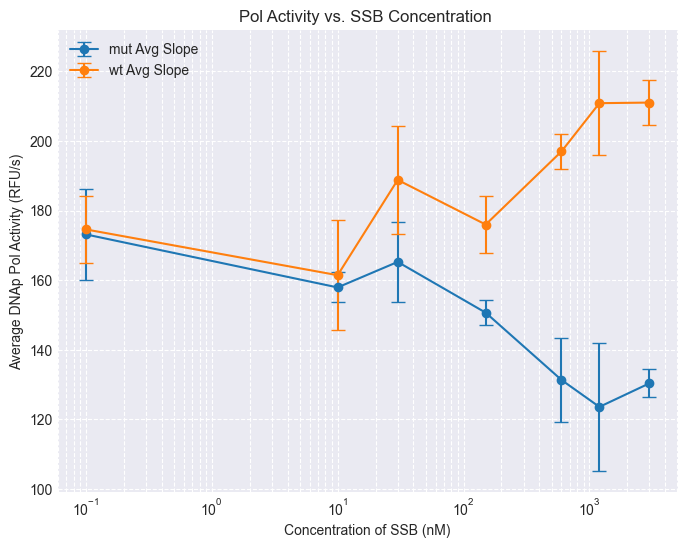

In [9]:
# First, we'll extract 'Enzyme_Type', 'Concentration', and 'Replicate' from the index
slopes_fits_stats_df = slopes_fits_stats_df.reset_index()
slopes_fits_stats_df[['Enzyme_Type', 'Concentration', 'Replicate']] = slopes_fits_stats_df['index'].str.split(' - ', expand=True)
slopes_fits_stats_df['Concentration'] = pd.to_numeric(slopes_fits_stats_df['Concentration'])

# Replace zeros with 0.1 for log-scale plotting
slopes_fits_stats_df['Concentration'] = slopes_fits_stats_df['Concentration'].replace(0, 0.1)

# Group by Enzyme_Type and Concentration to calculate mean and SEM
grouped = slopes_fits_stats_df.groupby(['Enzyme_Type', 'Concentration'])
mean_slopes = grouped['Slope_first_fit (RFU/s)'].mean()
sem_slopes = grouped['Slope_first_fit (RFU/s)'].sem()

# Prepare DataFrame for plotting
plot_data = pd.DataFrame({'Mean_Slope': mean_slopes, 'SEM': sem_slopes}).reset_index()

# Plotting
plt.figure(figsize=(8, 6))
enzyme_types = plot_data['Enzyme_Type'].unique()

for enzyme in enzyme_types:
    subset = plot_data[plot_data['Enzyme_Type'] == enzyme]
    plt.errorbar(subset['Concentration'], subset['Mean_Slope'], yerr=subset['SEM'], fmt='-o', capsize=5, label=f'{enzyme} Avg Slope')

plt.xscale('log')
plt.xlabel('Concentration of SSB (nM)')
plt.ylabel('Average DNAp Pol Activity (RFU/s)')
plt.title('Pol Activity vs. SSB Concentration ')
plt.legend()
plt.grid(True, which='both', linestyle='--')

# Apply a style for aesthetics
plt.style.use('seaborn-darkgrid')

# Save the plot (Assuming 'plots_directory' is already defined)
PolActivity_vs_concentration_plot = os.path.join(plots_directory, 'PolActivity_SSBConc_'+ str(time_limit_first_fit)+"_"+str(time_limit_second_fit_low)+"_"+str(time_limit_second_fit_high)+'.png')
plt.savefig(PolActivity_vs_concentration_plot)
plt.show()


/var/folders/7s/4zb5dg7n24q8rnf1200rm98r0000gn/T/ipykernel_87475/2946488414.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


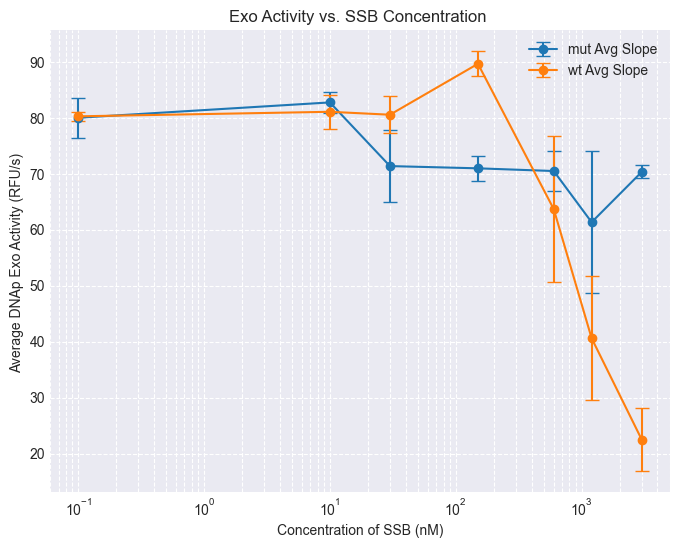

In [8]:
# Assuming 'slopes_fits_stats_df' is your DataFrame

# Replace zeros with 0.1 for log-scale plotting
slopes_fits_stats_df['Concentration'] = slopes_fits_stats_df['Concentration'].replace(0, 0.1)

# Group by Enzyme_Type and Concentration to calculate mean and SEM for the second slope
grouped_second = slopes_fits_stats_df.groupby(['Enzyme_Type', 'Concentration'])
mean_slopes_second = grouped_second['Slope_second_fit (RFU/s)'].mean()
sem_slopes_second = grouped_second['Slope_second_fit (RFU/s)'].sem()

# Prepare DataFrame for plotting the second slope
plot_data_second = pd.DataFrame({'Mean_Slope': mean_slopes_second, 'SEM': sem_slopes_second}).reset_index()

# Plotting for the second slope
plt.figure(figsize=(8, 6))
for enzyme in plot_data_second['Enzyme_Type'].unique():
    subset_second = plot_data_second[plot_data_second['Enzyme_Type'] == enzyme]
    plt.errorbar(subset_second['Concentration'], subset_second['Mean_Slope'], yerr=subset_second['SEM'], fmt='-o', capsize=5, label=f'{enzyme} Avg Slope')

plt.xscale('log')
plt.xlabel('Concentration of SSB (nM)')
plt.ylabel('Average DNAp Exo Activity (RFU/s) ')
plt.title('Exo Activity vs. SSB Concentration ')
plt.legend()
plt.grid(True, which='both', linestyle='--')

# Apply a style for aesthetics
plt.style.use('seaborn-darkgrid')

# Save the plot for the second slope
ExoActivity_vs_concentration_after_min_plot = os.path.join(plots_directory, 'ExoActivity_SSBConc_'+ str(time_limit_first_fit)+"_"+str(time_limit_second_fit_low)+"_"+str(time_limit_second_fit_high)+'.png')
plt.savefig(ExoActivity_vs_concentration_after_min_plot)
plt.show()
